In [9]:
% run functions.ipynb
% matplotlib inline

import pandas as pd
import numpy as np
import scipy.stats

# Reactor 1 with initial substate 0.5 g/L

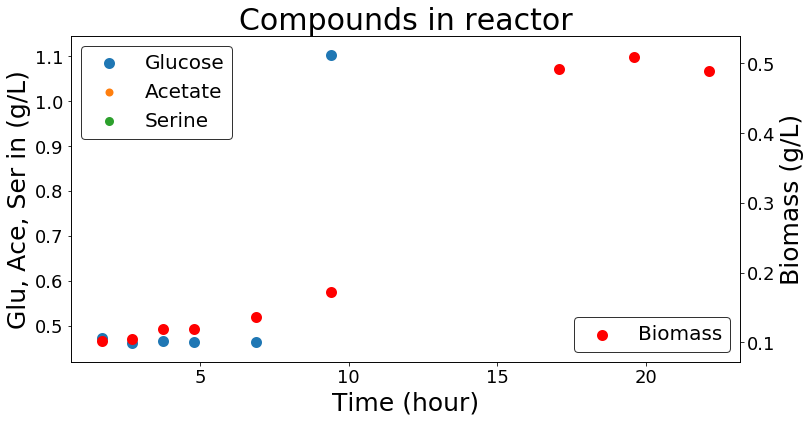

,OD,Time (hours),DilF,Citrate µg/µL,Glucose µg/µL,Pyruvate µg/µL,Succinate µg/µL,Formate µg/µL,Acetate µg/µL,EtOH µg/µL,N-Acetyl-DL-serine µg/µL,Unknown_protein mAU*min,Biomass g/L,Serine g/L
0,0.270,1.702222,5,NaN,0.471908,NaN,0.736295,0.294074,NaN,0.851136,NaN,NaN,0.1026,NaN
1,0.275,2.704167,5,NaN,0.461792,NaN,0.728784,0.302274,NaN,0.938264,NaN,NaN,0.1045,NaN
2,0.315,3.753889,5,NaN,0.465117,NaN,0.231136,0.378091,NaN,1.008089,NaN,NaN,0.1197,NaN
3,0.315,4.783056,5,NaN,0.464292,NaN,0.531994,0.362564,NaN,0.860020,NaN,NaN,0.1197,NaN
4,0.360,6.891667,5,NaN,0.463744,NaN,0.134289,0.442835,NaN,0.988289,NaN,NaN,0.1368,NaN
5,0.455,9.418056,5,NaN,1.103506,NaN,0.164072,0.138927,NaN,0.793449,NaN,0.125955,0.1729,NaN
6,1.295,17.069444,5,NaN,NaN,NaN,0.131639,NaN,NaN,0.653693,0.000467,1.017045,0.4921,NaN
7,1.340,19.593611,5,NaN,NaN,NaN,0.134759,NaN,NaN,0.579117,0.000352,1.052030,0.5092,NaN
8,1.285,22.118333,5,NaN,NaN,NaN,0.118765,NaN,NaN,0.672356,NaN,0.814764,0.4883,NaN


In [10]:
R1 = pd.ExcelFile('analytical_data/modified_analytical_data/compounds_batch_ser.xlsx')
R1 = R1.parse('R1_compounds')
R1 = R1.replace(['n.a.'],[np.nan])
plot_compounds_micro(R1, 1)
R1

#### Observed: No acetate or serine, last point of glucose should be disregarded

In [11]:
# Ysx, Ysa and Ysser
substrate = R1['Glucose µg/µL'][0] - 0
biomass = R1['Biomass g/L'][7] - R1['Biomass g/L'][0]
Ysx = biomass/substrate
Ysx

0.8616080516802946

#### Ysx =  0.86 gbio/gsub with an initial substrate concentration of 0.47 g/L, YsACE and YsSER is 0

#### From reactor one the mu was found to be 0.1186 1/h

In [12]:
# qs 
qs_values = []
qp_values = []
qs = 0.1186/Ysx
qs_values.append(qs)

#### qs is found to be 0.14 gsub/(gbio*h), qACE and qSER is 0

## amounts

In [13]:
t = R1['Time (hours)']
a = 0.0141
b = 1.1369
c = 202.56
volume = lambda t: (a*t**2 - b*t + c)/1000
R_volume = volume(t)
batch_amounts(R1, 1, R_volume, a, b, c)

# Reactor 2 with initial substate 1 g/L

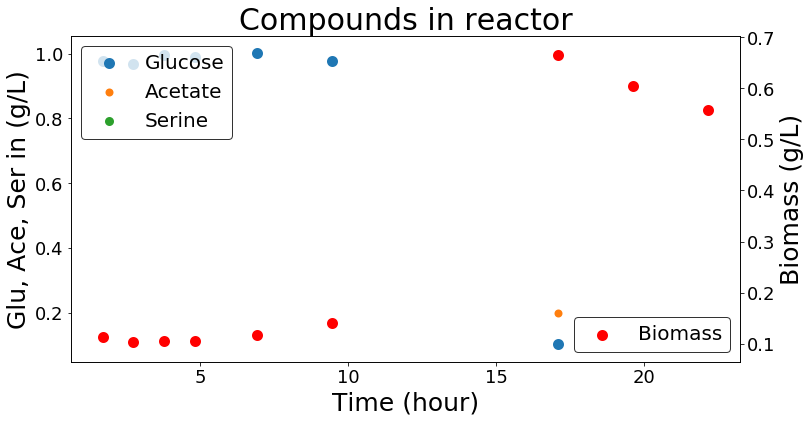

,OD,Time (hours),DilF,Citrate µg/µL,Glucose µg/µL,Pyruvate µg/µL,Succinate µg/µL,Formate µg/µL,Acetate µg/µL,EtOH µg/µL,N-Acetyl-DL-serine µg/µL,Unknown_protein mAU*min,Biomass g/L,Serine g/L
0,0.295,1.727222,5,NaN,0.977782,NaN,0.754702,0.324854,NaN,0.936631,NaN,NaN,0.1121,NaN
1,0.270,2.729167,5,NaN,0.967628,NaN,0.736553,0.292511,NaN,0.974216,NaN,NaN,0.1026,NaN
2,0.275,3.778889,5,NaN,0.996417,NaN,0.514692,0.323345,NaN,0.947519,NaN,0.186878,0.1045,NaN
3,0.275,4.808056,5,NaN,0.990994,NaN,0.290386,0.311763,NaN,0.996805,NaN,NaN,0.1045,NaN
4,0.305,6.916667,5,NaN,1.000677,NaN,0.197213,0.360866,NaN,0.948805,NaN,0.146236,0.1159,NaN
5,0.370,9.443056,5,NaN,0.977279,NaN,0.174981,0.089340,NaN,0.800094,NaN,NaN,0.1406,NaN
6,1.750,17.094444,5,NaN,0.102669,NaN,0.061728,NaN,0.198808,0.634252,0.008044,1.531529,0.6650,NaN
7,1.590,19.618611,5,NaN,NaN,NaN,0.137564,NaN,NaN,0.631369,0.006186,1.363676,0.6042,NaN
8,1.465,22.143333,5,NaN,NaN,0.008545,0.125131,NaN,NaN,0.701485,0.005659,1.311169,0.5567,NaN


In [14]:
R2 = pd.ExcelFile('analytical_data/modified_analytical_data/compounds_batch_ser.xlsx')
R2 = R2.parse('R2_compounds')
R2 = R2.replace(['n.a.'],[np.nan])
plot_compounds_micro(R2, 2)
R2

#### Observed: 1 value of acetate, no serine

In [15]:
# Ysx
substrate = R2['Glucose µg/µL'][0] - R2['Glucose µg/µL'][6]
biomass = R2['Biomass g/L'][6] - R2['Biomass g/L'][0]
Ysx = biomass/substrate
print(Ysx)

acetate = R2['Acetate µg/µL'][6] - 0
Ysa = acetate/substrate
print(Ysa)

Yax = biomass/acetate
print(Yax)

0.6318045649417604
0.2271798013235084
2.781077196392379


#### Ysx =  0.63 gbio/gsub with an initial substrate concentration of 0.98 g/L
#### YsACE = 0.23 gacetate/gsub with an initial substrate concentration of 0.98 g/L
#### Yax = 2.78 gbio/gace with an initial substrate concentration of 0.98 g/L

#### From reactor 2 the mu was found to be 0.1790 1/h

In [16]:
# qs, qa
qs = 0.1790/Ysx
qs_values.append(qs)
print(qs)

qsa = 0.18/Ysa
print(qsa)

qax = 0.18/Yax
print(qax)

0.2833154585017919
0.7923239608070461
0.06472312247696557


#### qs = 0.29 gsub/(gbio*h)
#### qsACE = 0.79 gsub/(gACE*h)
#### qbioACE = 0.79 gACE/(gbio*h)

## amounts

In [17]:
t = R2['Time (hours)']
a = 0.0145
b = 1.1323
c = 202.94
volume = lambda t: (a*t**2 - b*t + c)/1000
R_volume = volume(t)
batch_amounts(R2, 2, R_volume, a, b, c)

# Reactor 3 with initial substate 2 g/L

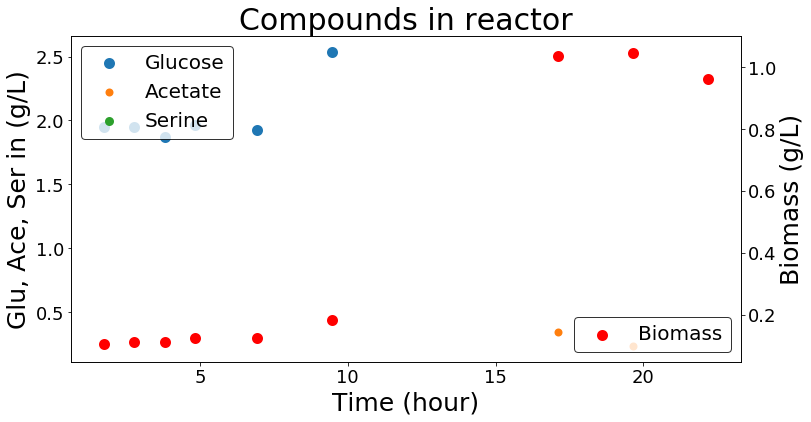

,OD,Time (hours),DilF,Citrate µg/µL,Glucose µg/µL,Pyruvate µg/µL,Succinate µg/µL,Formate µg/µL,Acetate µg/µL,EtOH µg/µL,N-Acetyl-DL-serine µg/µL,Unknown_protein mAU*min,Biomass g/L,Serine g/L
0,0.275,1.752222,5,NaN,1.951148,NaN,0.751267,0.286250,NaN,0.946505,NaN,NaN,0.1045,NaN
1,0.295,2.754167,5,NaN,1.952075,NaN,0.729065,0.288676,NaN,1.014421,NaN,NaN,0.1121,NaN
2,0.295,3.803889,5,NaN,1.873104,NaN,0.479246,0.327061,NaN,0.960885,NaN,0.121893,0.1121,NaN
3,0.325,4.833056,5,NaN,1.964338,NaN,0.214728,0.346624,NaN,1.066240,NaN,NaN,0.1235,NaN
4,0.325,6.941667,5,NaN,1.924205,NaN,0.150777,0.373788,NaN,0.987582,NaN,NaN,0.1235,NaN
5,0.480,9.468056,5,NaN,2.538432,NaN,0.196891,0.075890,NaN,0.778951,NaN,0.172233,0.1824,NaN
6,2.725,17.119444,5,NaN,NaN,0.006635,0.149685,NaN,0.341619,0.628910,0.019890,5.488110,1.0355,NaN
7,2.750,19.643611,5,NaN,NaN,NaN,0.143469,NaN,0.234543,0.638305,0.019975,5.476247,1.0450,NaN
8,2.530,22.168333,5,NaN,NaN,0.006601,0.123391,NaN,NaN,0.686392,0.021447,5.385449,0.9614,NaN


In [18]:
R3 = pd.ExcelFile('analytical_data/modified_analytical_data/compounds_batch_ser.xlsx')
R3 = R3.parse('R3_compounds')
R3 = R3.replace(['n.a.'],[np.nan])
plot_compounds_micro(R3, 3)
R3

#### Observed: last point of glucose should be disregarded, 2 values of acetate, no serine

In [19]:
# Ysx
substrate = R3['Glucose µg/µL'][0] - 0
biomass = R3['Biomass g/L'][7] - R3['Biomass g/L'][0]
Ysx = biomass/substrate
print(Ysx)

acetate = R3['Acetate µg/µL'][7] - 0
Ysa = acetate/substrate
print(Ysa)

Yax = biomass/acetate
print(Yax)

0.48202389851949734
0.12020772500897095
4.0099244743507505


#### Ysx =  0.48 gbio/gsub with an initial substrate concentration of 1.95 g/L
#### YsACE = 0.12 gacetate/gsub with an initial substrate concentration of 1.95 g/L
#### Yax = 4 gbio/gace with an initial substrate concentration of 1.95 g/L

#### From reactor 3 the mu was found to be 0.2131 1/h

In [20]:
# qs, qa
qs = 0.2131/Ysx
qs_values.append(qs)
print(qs)

qsa = 0.2131/Ysa
print(qsa)

qax = 0.2131/Yax
print(qax)

0.44209426265901286
1.7727646038064244
0.05314314555375838


#### qs = 0.44 gsub/(gbio*h)
#### qsACE = 1.77 gsub/(gACE*h)
#### qbioACE = 0.05 gACE/(gbio*h)

## amounts

In [21]:
t = R3['Time (hours)']
a = 0.0155
b = 1.1401
c = 202.79

volume = lambda t: (a*t**2 - b*t + c)/1000
R_volume = volume(t)
batch_amounts(R3, 3, R_volume, a, b, c)

# Reactor 4 with initial substate 3 g/L

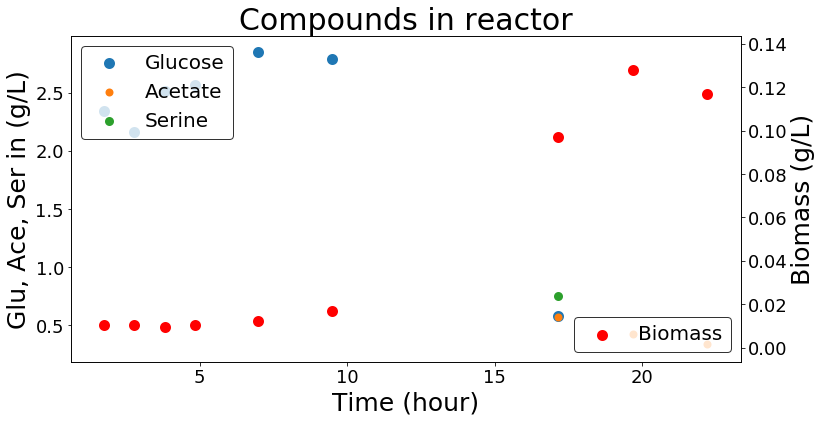

,OD,Time (hours),DilF,Citrate g/L,Glucose g/L,Pyruvate g/L,Succinate g/L,Formate g/L,Acetate g/L,EtOH g/L,N-Acetyl-DL-serine g/L,Unknown_protein mAU*min,Biomass g/L,Serine g/L
0,0.027,1.777222,5,NaN,2.347059,NaN,0.651802,0.262552,NaN,0.866030,NaN,NaN,0.01026,NaN
1,0.027,2.779167,5,NaN,2.166398,NaN,0.580514,0.234328,NaN,0.854009,NaN,NaN,0.01026,NaN
2,0.025,3.828889,5,NaN,2.511764,NaN,0.433287,0.294619,NaN,0.907647,NaN,NaN,0.00950,NaN
3,0.028,4.858056,5,NaN,2.569378,NaN,0.225194,0.308817,NaN,0.948385,NaN,0.058891,0.01064,NaN
4,0.032,6.966667,5,NaN,2.855457,NaN,0.197458,0.359390,NaN,1.003388,NaN,NaN,0.01216,NaN
5,0.044,9.493056,5,NaN,2.789628,NaN,0.198234,0.045575,NaN,0.680409,NaN,0.150457,0.01672,NaN
6,0.255,17.144444,5,NaN,0.580676,0.006575,0.095896,0.099177,0.569800,0.510857,0.031730,6.724779,0.09690,0.75
7,0.336,19.668611,5,NaN,NaN,NaN,0.113720,NaN,0.421336,0.488697,0.024093,5.899820,0.12768,NaN
8,0.308,22.193333,5,NaN,NaN,0.015144,0.262683,NaN,0.334589,0.607865,0.029730,6.789403,0.11704,NaN


In [22]:
R4 = pd.ExcelFile('analytical_data/modified_analytical_data/compounds_batch_ser.xlsx')
R4 = R4.parse('R4_compounds')
R4 = R4.replace(['n.a.'],[np.nan])
plot_compounds(R4, 4)
R4

#### Observed: glucose is just weird in this, 3 values of acetate, 1 value of serine

In [23]:
# Ysx
substrate = R4['Glucose g/L'][0] - 0
biomass = R4['Biomass g/L'][7] - R4['Biomass g/L'][0]
Ysx = biomass/substrate
print(Ysx)

acetate = R4['Acetate g/L'][7] - 0
Ysa = acetate/substrate
print(Ysa)

serine = R4['Serine g/L'][6] - 0
Yss = serine/substrate
print(Yss)

Yax = biomass/acetate
print(Yax)

Yserx = (R4['Biomass g/L'][6] - R4['Biomass g/L'][0])/serine
print(Yserx)

0.050028577700687166
0.17951671336003114
0.31954891224250875
0.27868479076013364
0.11552


#### Ysx =  0.05 gbio/gsub with an initial substrate concentration of 2.35 g/L
#### YsACE = 0.18 gacetate/gsub with an initial substrate concentration of 2.35 g/L
#### YsSER = 0.32 gacetate/gsub with an initial substrate concentration of 2.35 g/L
#### Yax = 0.28 gbio/gace with an initial substrate concentration of 2.35 g/L
#### Yserx = 0.12 gbio/gser

#### From reactor 4 the mu was found to be 0.2099 1/h 

In [24]:
# qs, qa
qs = 0.2099/Ysx
qs_values.append(qs)
print(qs)

qsa = 0.2099/Ysa
print(qsa)

qss = 0.2099/Yss
print(qss)

qax = 0.2099/Yax
print(qax)

qserx = 0.2099/Yserx
qp_values.append(qserx)
print(qserx)

4.19560198684435
1.1692504618165187
0.6568634470603514
0.7531806792451143
1.8170013850415514


#### qs = 4.20 gsub/(gbio*h)
#### qsACE = 1.17 gsub/(gACE*h)
#### qsSER = 0.66 gsub/(gSER*h)
#### qax = 0.75 gace/(gbio*h)
#### qserx = 1.8 gser/(gbio*h)

## amounts

In [25]:
t = R4['Time (hours)']
a = 0.0176
b = 1.1646
c = 203.06

volume = lambda t: (a*t**2 - b*t + c)/1000
R_volume = volume(t)
batch_amounts_glucose_grams(R4, 4, R_volume, a, b, c)

# Reactor 5 with initial substate 5 g/L

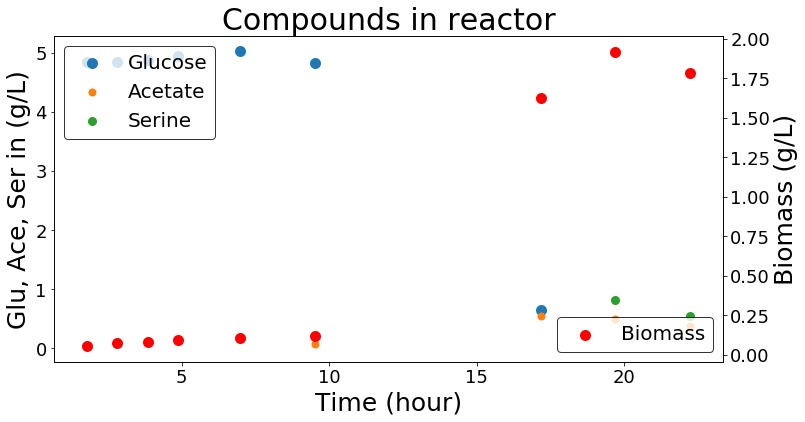

,OD,Time (hours),DilF,Citrate g/L,Glucose g/L,Pyruvate g/L,Succinate g/L,Formate g/L,Acetate g/L,EtOH g/L,N-Acetyl-DL-serine g/L,Unknown_protein mAU*min,Biomass g/L,Serine g/L
0,0.155,1.802222,5,NaN,4.838233,NaN,0.722219,0.297987,NaN,0.938582,NaN,NaN,0.0589,NaN
1,0.205,2.804167,5,NaN,4.839549,NaN,0.694397,0.286540,NaN,1.045109,NaN,NaN,0.0779,NaN
2,0.215,3.853889,5,NaN,4.871098,NaN,0.859169,NaN,NaN,1.016317,NaN,NaN,0.0817,NaN
3,0.245,4.883056,5,NaN,4.946703,NaN,0.216354,0.351022,NaN,1.064727,NaN,NaN,0.0931,NaN
4,0.280,6.991667,5,NaN,5.030502,NaN,0.158080,0.360954,NaN,1.055293,NaN,0.141404,0.1064,NaN
5,0.320,9.518056,5,NaN,4.820747,NaN,0.132197,NaN,0.063231,0.787426,NaN,NaN,0.1216,NaN
6,4.265,17.169444,5,NaN,0.652328,NaN,0.093399,0.159756,0.538403,0.547195,0.033462,14.984397,1.6207,NaN
7,5.040,19.693611,5,NaN,NaN,NaN,0.123442,0.089434,0.495362,0.501277,0.032819,17.543726,1.9152,0.81
8,4.690,22.218333,5,NaN,NaN,NaN,0.202850,0.092531,0.378512,0.576831,0.031116,17.092965,1.7822,0.55


In [26]:
R5 = pd.ExcelFile('analytical_data/modified_analytical_data/compounds_batch_ser.xlsx')
R5 = R5.parse('R5_compounds')
R5 = R5.replace(['n.a.'],[np.nan])
plot_compounds(R5, 5)
R5

#### Observed: 4 values of acetate, 2 value of serine

In [27]:
# Ysx
substrate = R5['Glucose g/L'][0] - 0
biomass = R5['Biomass g/L'][7] - R4['Biomass g/L'][0]
Ysx = biomass/substrate
print(Ysx)

acetate = R5['Acetate g/L'][7] - 0
Ysa = acetate/substrate
print(Ysa)

serine = R5['Serine g/L'][7] - 0
Yss = serine/substrate
print(Yss)

Yax = biomass/acetate
print(Yax)

Yserx = (R5['Biomass g/L'][7] - R5['Biomass g/L'][0])/serine
print(Yserx)

0.3937263865436752
0.10238494345837515
0.16741649243565515
3.8455496799072373
2.291728395061728


#### Ysx =  0.39 gbio/gsub with an initial substrate concentration of 4.83 g/L
#### YsACE = 0.10 gacetate/gsub with an initial substrate concentration of 4.83 g/L
#### YsSER = 0.17 gacetate/gsub with an initial substrate concentration of 4.83 g/L
#### Yax = 3.85 gbio/gace with an initial substrate concentration of 4.83 g/L
#### Yserx = 2.29 gbio/gser

#### From reactor 5 the mu was found to be 0.3385 1/h 

In [28]:
# qs, qa
mu  = 0.3385

qs = mu/Ysx
qs_values.append(qs)
print(qs)

qsa = mu/Ysa
print(qsa)

qss = mu/Yss
print(qss)

qax = mu/Yax
print(qax)

qserx = mu/Yserx
qp_values.append(qserx)
print(qserx)

0.8597340985233941
3.306150187381976
2.021903547705129
0.08802382706655486
0.1477051123202069


#### qs = 0.86 gsub/(gbio*h)
#### qsACE = 3.31 gsub/(gACE*h)
#### qsSER = 2.02 gsub/(gSER*h)
#### qax = 0.09 gace/(gbio*h)
#### qserx = 0.15 gser/(gbio*h)

## amounts

In [29]:
t = R5['Time (hours)']
a = 0.0196
b = 1.1876
c = 202.93


volume = lambda t: (a*t**2 - b*t + c)/1000
R_volume = volume(t)
batch_amounts_glucose_grams(R5, 5, R_volume, a, b, c)

# Reactor 6 with initial substate 7.5 g/L

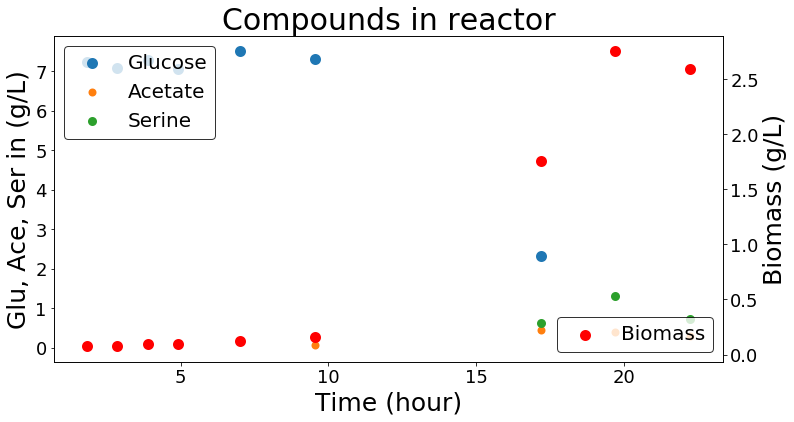

,OD,Time (hours),DilF,Citrate g/L,Glucose g/L,Pyruvate g/L,Succinate g/L,Formate g/L,Acetate g/L,EtOH g/L,N-Acetyl-DL-serine g/L,Unknown_protein mAU*min,Biomass g/L,Serine g/L
0,0.215,1.827222,5,NaN,7.240699,NaN,0.687400,0.295453,NaN,0.976958,NaN,NaN,0.0817,NaN
1,0.205,2.829167,5,NaN,7.073052,NaN,0.689148,0.305521,NaN,1.032699,NaN,0.252741,0.0779,NaN
2,0.260,3.878889,5,NaN,7.275289,NaN,0.179895,0.381292,NaN,0.993635,NaN,NaN,0.0988,NaN
3,0.250,4.908056,5,NaN,7.047488,NaN,0.181857,0.375049,NaN,1.023219,NaN,NaN,0.0950,NaN
4,0.335,7.016667,5,NaN,7.519786,NaN,0.128961,0.388347,NaN,1.032543,NaN,0.174412,0.1273,NaN
5,0.425,9.543056,5,NaN,7.315110,NaN,0.187603,0.040195,0.067033,0.785150,NaN,NaN,0.1615,NaN
6,4.635,17.194444,5,NaN,2.322788,NaN,0.688147,0.225204,0.451734,0.438848,0.031139,21.254214,1.7613,0.61
7,7.240,19.718611,5,NaN,NaN,0.010787,0.221221,0.111477,0.395856,0.444283,0.024128,31.557921,2.7512,1.31
8,6.820,22.243333,5,NaN,NaN,NaN,0.425017,0.171191,0.295830,0.498750,0.033239,31.919521,2.5916,0.73


In [30]:
R6 = pd.ExcelFile('analytical_data/modified_analytical_data/compounds_batch_ser.xlsx')
R6 = R6.parse('R6_compounds')
R6 = R6.replace(['n.a.'],[np.nan])
plot_compounds(R6, 6)
R6

#### Observed: 4 values of acetate, 3 value of serine

In [31]:
# Ysx
substrate = R6['Glucose g/L'][0] - 0
biomass = R6['Biomass g/L'][7] - R6['Biomass g/L'][0]
Ysx = biomass/substrate
print(Ysx)

acetate = R6['Acetate g/L'][7] - 0
Ysa = acetate/substrate
print(Ysa)

serine = R6['Serine g/L'][7] - 0
Yss = serine/substrate
print(Yss)

Yax = biomass/acetate
print(Yax)

Yserx = biomass/serine
qp_values.append(qserx)
print(Yserx)

0.3686798544815851
0.054671008205461974
0.18092174915560086
6.74360811302455
2.0377862595419844


#### Ysx =  0.37 gbio/gsub with an initial substrate concentration of 7.24 g/L
#### YsACE = 0.05 gacetate/gsub with an initial substrate concentration of 7.24 g/L
#### YsSER = 0.18 gacetate/gsub with an initial substrate concentration of 7.24 g/L
#### Yax =  6.74 gbio/gace with an initial substrate concentration of 7.24 g/L
#### Yserx = 2.03 gbio/gser

#### From reactor 6 the mu was found to be 0.2865 1/h 

In [32]:
# qs, qa
mu = 0.2865

qs = mu/Ysx
qs_values.append(qs)
print(qs)

qsa = mu/Ysa
print(qsa)

qss = mu/Yss
print(qss)

qax = mu/Yax
print(qax)

qserx = mu/Yserx
qp_values.append(qserx)
print(qserx)

0.77709697591928
5.2404374714161
1.5835575398599373
0.04248467514692264
0.14059374414684397


#### qs = 0.79 gsub/(gbio*h)
#### qsACE = 5.30 gsub/(gACE*h)
#### qsSER = 1.60 gsub/(gSER*h)
#### qax = 0.04 gace/(gbio*h)
#### qserx = 0.14 gser/(gbio*h)

## amounts

In [33]:
t = R6['Time (hours)']
a = 0.0225
b = 1.2233
c = 202.75

volume = lambda t: (a*t**2 - b*t + c)/1000
R_volume = volume(t)
batch_amounts_glucose_grams(R6, 6, R_volume, a, b, c)

# Reactor 7 with initial substate 10 g/L

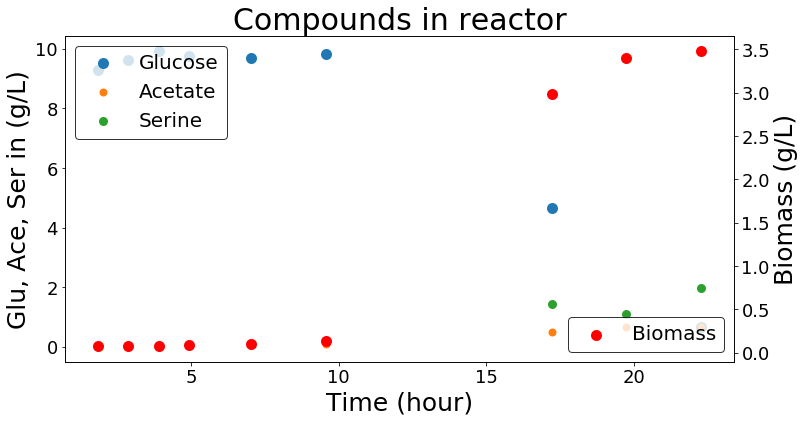

,OD,Time (hours),DilF,Citrate g/L,Glucose g/L,Pyruvate g/L,Succinate g/L,Formate g/L,Acetate g/L,EtOH g/L,N-Acetyl-DL-serine µg/µL,Unknown_protein mAU*min,Biomass g/L,Serine g/L
0,0.205,1.852222,5.0,NaN,9.289819,0.005301,0.673413,0.301784,NaN,0.861216,NaN,NaN,0.07790,NaN
1,0.198,2.854167,5.0,NaN,9.631064,NaN,0.688578,0.301992,NaN,0.997954,NaN,NaN,0.07524,NaN
2,0.213,3.903889,5.0,NaN,9.934329,NaN,0.457179,0.357073,NaN,1.048867,NaN,NaN,0.08094,NaN
3,0.224,4.933056,5.0,NaN,9.760728,0.006192,0.233494,0.364249,NaN,1.008184,NaN,NaN,0.08512,NaN
4,0.262,7.041667,5.0,NaN,9.702934,NaN,0.149597,0.315877,NaN,0.972390,NaN,NaN,0.09956,NaN
5,0.365,9.568056,5.0,NaN,9.824944,NaN,0.124497,NaN,0.089934,0.773493,0.000940,0.147432,0.13870,NaN
6,7.850,17.219444,5.0,NaN,4.669729,0.013442,0.102636,0.216340,0.501398,0.486235,0.030550,18.593665,2.98300,1.44
7,8.940,19.743611,5.0,NaN,NaN,0.007291,0.594508,0.273623,0.670098,0.363019,0.054563,38.190771,3.39720,1.10
8,9.150,22.268333,5.0,NaN,0.682888,0.016817,0.743741,0.415867,0.665102,0.367805,0.061782,39.842150,3.47700,1.97
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
R7 = pd.ExcelFile('analytical_data/modified_analytical_data/compounds_batch_ser.xlsx')
R7 = R7.parse('R7_compounds')
R7 = R7.replace(['n.a.'],[np.nan])
plot_compounds(R7, 7)
R7

#### Observed: 4 values of acetate, 3 value of serine

In [35]:
# Ysx
substrate = R7['Glucose g/L'][0] - R7['Glucose g/L'][8]
biomass = R7['Biomass g/L'][8] - R7['Biomass g/L'][0]
Ysx = biomass/substrate
print(Ysx)

acetate = R7['Acetate g/L'][8] - 0
Ysa = acetate/substrate
print(Ysa)

serine = R7['Serine g/L'][8] - 0
Yss = serine/substrate
print(Yss)

Yax = biomass/acetate
print(Yax)

Yserx = biomass/serine
print(Yserx)

0.3949258676080145
0.0772751968293761
0.22888528115906817
5.110642014668849
1.7254314720812183


#### Ysx =  0.40 gbio/gsub with an initial substrate concentration of 9.29 g/L
#### YsACE = 0.08 gacetate/gsub with an initial substrate concentration of 9.29 g/L
#### YsSER = 0.23 gacetate/gsub with an initial substrate concentration of 9.29 g/L
#### Yax =  5.11 gbio/gace with an initial substrate concentration of 9.29 g/L
#### Yserx = 1.73 gbio/gser

#### From reactor 7 the mu was found to be 0.4010 1/h 

In [36]:
# qs, qa
mu = 0.4010

qs = mu/Ysx
qs_values.append(qs)
print(qs)

qsa = mu/Ysa
print(qsa)

qss = mu/Yss
print(qss)

qax = mu/Yax
print(qax)

qserx = mu/Yserx
qp_values.append(qserx)
print(qserx)

1.0153804369128194
5.189245921759467
1.7519693619849563
0.07846372311913602
0.23240563678620813


#### qs = 1.01 gsub/(gbio*h)
#### qsACE = 5.18 gsub/(gACE*h)
#### qsSER = 1.75 gsub/(gSER*h)
#### qax = 0.08 gace/(gbio*h)
#### qserx = 0.23 gser/(gbio*h)

## amounts

In [37]:
t = R7['Time (hours)']
a = 0.0254
b = 1.2637
c = 203.14

volume = lambda t: (a*t**2 - b*t + c)/1000
R_volume = volume(t)
batch_amounts_glucose_grams(R7, 7, R_volume, a, b, c)

# Reactor 8 with initial substate 20 g/L

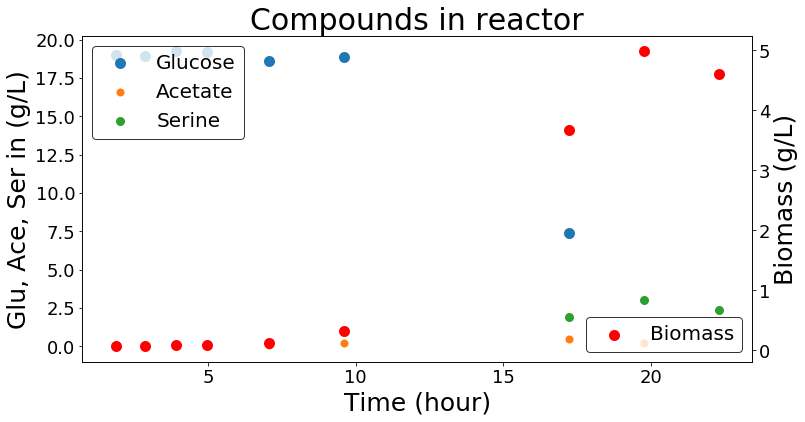

,OD,Time (hours),DilF,Citrate g/L,Glucose g/L,Pyruvate g/L,Succinate g/L,Formate g/L,Acetate g/L,EtOH g/L,N-Acetyl-DL-serine µg/µL,Unknown_protein mAU*min,Biomass g/L,Serine g/L
0,0.160,1.877222,5,NaN,19.000061,0.007075,0.713937,0.349755,NaN,1.017995,NaN,0.316368,0.0608,NaN
1,0.195,2.879167,5,NaN,18.914277,NaN,0.498845,0.429117,NaN,1.044399,NaN,NaN,0.0741,NaN
2,0.205,3.928889,5,NaN,19.282775,NaN,0.230525,0.454509,NaN,1.036731,NaN,NaN,0.0779,NaN
3,0.235,4.958056,5,NaN,19.195787,NaN,0.182044,0.420738,NaN,0.996286,0.000266,NaN,0.0893,NaN
4,0.325,7.066667,5,NaN,18.609177,0.006891,0.126913,0.085416,0.069585,0.806139,0.001430,0.140202,0.1235,NaN
5,0.830,9.593056,5,NaN,18.862056,0.007836,0.050268,0.051595,0.217481,0.799084,0.004684,0.407202,0.3154,NaN
6,9.660,17.244444,5,NaN,7.394218,0.020466,0.872362,0.641188,0.452514,0.344187,0.051391,53.206681,3.6708,1.917768
7,13.130,19.768611,5,NaN,NaN,0.014270,1.036505,1.225573,0.239203,0.233836,0.183056,46.334789,4.9894,3.027900
8,12.130,22.293333,5,NaN,NaN,0.034755,1.764143,1.501287,NaN,0.239562,0.196972,51.183378,4.6094,2.374449


In [38]:
R8 = pd.ExcelFile('analytical_data/modified_analytical_data/compounds_batch_ser.xlsx')
R8 = R8.parse('R8_compounds')
R8 = R8.replace(['n.a.'],[np.nan])
plot_compounds(R8, 8)
R8

#### Observed: 4 values of acetate, 3 value of serine

In [39]:
# Ysx
substrate = R8['Glucose g/L'][0] - 0
biomass = R8['Biomass g/L'][7] - R8['Biomass g/L'][0]
Ysx = biomass/substrate
print(Ysx)

acetate = R8['Acetate g/L'][7] - 0
Ysa = acetate/substrate
print(Ysa)

serine = R8['Serine g/L'][7] - 0
Yss = serine/substrate
print(Yss)

Yax = biomass/acetate
print(Yax)

Yserx = biomass/serine
print(Yserx)

0.25939917161539877
0.012589600847873923
0.15936265670275265
20.60424113121942
1.627728709990301


#### Ysx =  0.26 gbio/gsub with an initial substrate concentration of 19.00 g/L
#### YsACE = 0.01 gacetate/gsub with an initial substrate concentration of 19.00 g/L
#### YsSER = 0.16 gacetate/gsub with an initial substrate concentration of 19.00 g/L
#### Yax =  20.60 gbio/gace with an initial substrate concentration of 19.00 g/L
#### Yserx = 1.63 gbio/gser

#### From reactor 8 the mu was found to be 0.3304 1/h 

In [40]:
# qs, qa
mu = 0.3304

qs = mu/Ysx
qs_values.append(qs)
print(qs)

qsa = mu/Ysa
print(qsa)

qss = mu/Yss
print(qss)

qax = mu/Yax
print(qax)

qserx = mu/Yserx
qp_values.append(qserx)
print(qserx)

1.2737126257668683
26.243882073179194
2.0732586092378633
0.016035533553302284
0.20298222791804707


#### qs = 1.27 gsub/(gbio*h)
#### qsACE = 26.2 gsub/(gACE*h)
#### qsSER = 2.07 gsub/(gSER*h)
#### qax = 0.02 gace/(gbio*h)
#### qserx = 0.20 gser/(gbio*h)

## amounts

In [41]:
t = R8['Time (hours)']
a = 0.0306
b = 1.2831
c = 203.75
volume = lambda t: (a*t**2 - b*t + c)/1000
R_volume = volume(t)

batch_amounts_glucose_grams(R8, 8, R_volume, a, b, c)

# Reactor 9 with initial substate 40 g/L

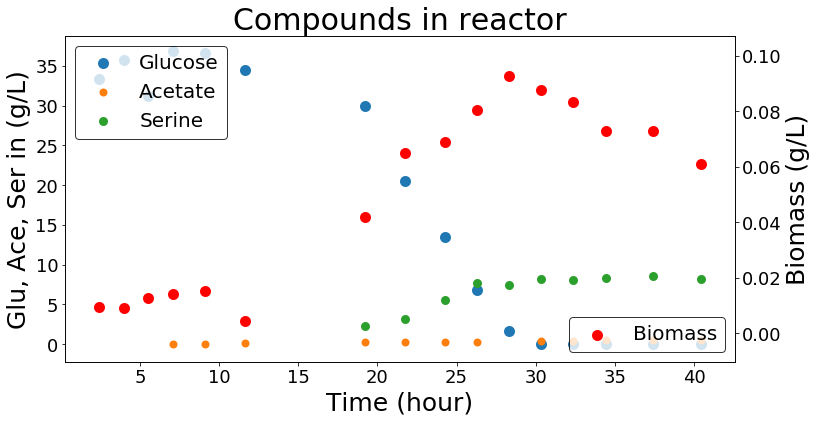

,OD,Time (hours),DilF,Citrate µg/µL,Glucose µg/µL,Pyruvate µg/µL,Succinate µg/µL,Formate µg/µL,Acetate µg/µL,EtOH µg/µL,N-Acetyl-DL-serine µg/µL,Unknown_protein mAU*min,Biomass g/L,Serine g/L
0,0.025,2.385556,5,NaN,33.355381,NaN,NaN,NaN,NaN,0.412759,NaN,NaN,0.00950,NaN
1,0.024,3.961389,5,NaN,35.762693,NaN,NaN,NaN,NaN,0.421197,NaN,NaN,0.00912,NaN
2,0.033,5.487500,5,NaN,31.161997,NaN,NaN,NaN,NaN,0.377055,NaN,NaN,0.01254,NaN
3,0.037,7.068333,5,NaN,36.935327,NaN,NaN,NaN,0.019620,0.424255,NaN,NaN,0.01406,NaN
4,0.040,9.101667,5,NaN,36.660715,0.002254,NaN,NaN,0.030714,0.388274,NaN,NaN,0.01520,NaN
5,0.011,11.638056,5,NaN,34.535022,0.003699,NaN,NaN,0.098186,0.352800,NaN,NaN,0.00418,NaN
6,0.110,19.234167,5,NaN,29.931397,0.008369,NaN,NaN,0.290917,0.149570,NaN,23.497779,0.04180,2.311307
7,0.171,21.758889,5,NaN,20.554216,0.013011,NaN,NaN,0.263174,0.109700,NaN,41.863665,0.06498,3.225404
8,0.181,24.282778,5,NaN,13.529412,0.005279,NaN,0.158615,0.271235,0.174490,NaN,41.871485,0.06878,5.515419
9,0.212,26.309444,5,NaN,6.794534,0.005046,NaN,NaN,0.258293,0.143642,NaN,32.167916,0.08056,7.647577


In [42]:
R9 = pd.ExcelFile('analytical_data/modified_analytical_data/compounds_batch_R9toR12_ser.xlsx')
R9 = R9.parse('R9_compounds')
R9 = R9.replace(['n.a.'],[np.nan])
plot_compounds_micro(R9, 9)
R9

#### Observed: A lot of values, cells are not growing very much hence the low Ysx. 

In [43]:
# Ysx
substrate = R9['Glucose µg/µL'][0] - R9['Glucose µg/µL'][11]
biomass = R9['Biomass g/L'][11] - R9['Biomass g/L'][0]
Ysx = biomass/substrate
print(Ysx)

acetate = R9['Acetate µg/µL'][11] - 0
Ysa = acetate/substrate
print(Ysa)

serine = R9['Serine g/L'][11] - 0
Yss = serine/substrate
print(Yss)

Yax = biomass/acetate
print(Yax)

Yserx = biomass/serine
print(Yserx)

0.0023510380661568697
0.01377860257156831
0.24728187674017746
0.17062964505618
0.009507522739432854


#### Ysx =  0.002 gbio/gsub with an initial substrate concentration of 33.36 g/L
#### YsACE = 0.014 gacetate/gsub with an initial substrate concentration of 33.36 g/L
#### YsSER = 0.25 gacetate/gsub with an initial substrate concentration of 33.36 g/L
#### Yax = 0.17 gbio/gace with an initial substrate concentration of 33.36 g/L
#### Yserx = 0.009 gbio/gser

#### From reactor 9 the mu was found to be 0.3031 1/h 

In [44]:
# qs, qa
mu = 0.3031

qs = mu/Ysx
qs_values.append(qs)
print(qs)

qsa = mu/Ysa
print(qsa)

qss = mu/Yss
print(qss)

qax = mu/Yax
print(qax)

qserx = mu/Yserx
qp_values.append(qserx)
print(qserx)

128.92177475265774
21.99787666605878
1.225726705068934
1.77636189713812
31.880018413511635


#### qs = 128.92 gsub/(gbio*h)
#### qsACE = 21.99 gsub/(gACE*h)
#### qsSER = 1.23 gsub/(gSER*h)
#### qax = 1.78 gace/(gbio*h)
#### qserx = 31.88 gser/(gbio*h)

## amounts

In [45]:
t = R9['Time (hours)'][:8]
a = 0.0285
b = 1.2689
c = 204.31
volume = lambda t: (a*t**2 - b*t + c)/1000
R_volume = volume(t)


batch_amounts(R9, 9, R_volume, a, b, c)


R_amounts = pd.DataFrame()
R_amounts['Time (hours)'] = R9['Time (hours)'][:8]
R_amounts['Volume (L)'] = R_volume
R_amounts['Biomass (g)'] = R9['Biomass g/L'][:8]*R_volume
R_amounts['Glucose (g)'] = R9['Glucose µg/µL'][:8]*R_volume
R_amounts['Biomass initial (g)'] = R_amounts['Biomass (g)'][0]
R_amounts['Glucose initial (g)'] = R_amounts['Glucose (g)'][0]
R_amounts['a'] = a
R_amounts['b'] = b
R_amounts['c'] = c

R_amounts.to_csv('estimation/batch_amounts/R9_amounts.csv')

# Reactor 10 with initial substate 60 g/L

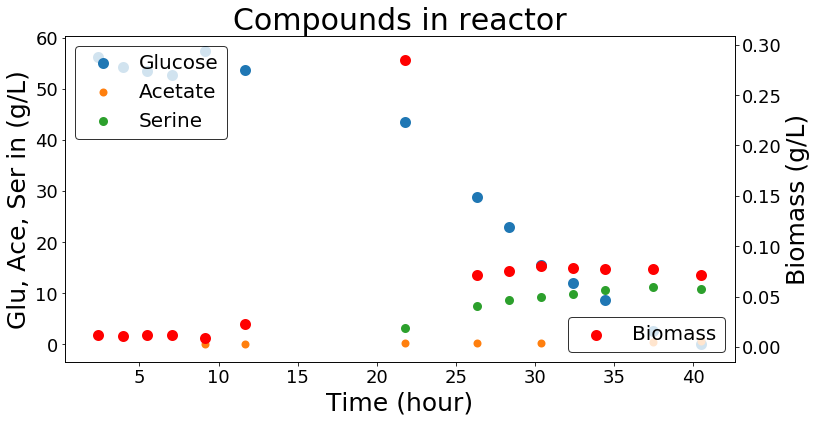

,OD,Time (hours),DilF,Citrate µg/µL,Glucose µg/µL,Pyruvate µg/µL,Succinate µg/µL,Formate µg/µL,Acetate µg/µL,EtOH µg/µL,N-Acetyl-DL-serine µg/µL,Unknown_protein mAU*min,Biomass g/L,Serine g/L
0,0.030,2.410556,5,NaN,56.150729,0.006416,NaN,NaN,NaN,0.449243,NaN,NaN,0.01140,NaN
1,0.028,3.986389,5,NaN,54.321461,0.004785,NaN,NaN,NaN,0.449688,NaN,NaN,0.01064,NaN
2,0.032,5.512500,5,NaN,53.428115,0.006534,NaN,NaN,NaN,0.437818,NaN,NaN,0.01216,NaN
3,0.032,7.093333,5,NaN,52.604325,0.004638,NaN,NaN,NaN,0.402399,NaN,NaN,0.01216,NaN
4,0.024,9.126667,5,NaN,57.480848,0.004960,NaN,NaN,0.031353,0.388358,NaN,NaN,0.00912,NaN
5,0.060,11.663056,5,NaN,53.684534,0.005007,NaN,NaN,0.095450,0.356143,NaN,NaN,0.02280,NaN
6,0.750,21.783889,5,NaN,43.400138,0.003778,0.165774,NaN,0.219789,0.093653,NaN,32.367967,0.28500,3.146109
7,0.189,26.334444,5,NaN,28.892892,0.005181,NaN,NaN,0.184179,0.149669,NaN,39.085689,0.07182,7.527166
8,0.197,28.360000,5,NaN,22.923960,0.005278,NaN,NaN,NaN,0.124158,NaN,33.509192,0.07486,8.660059
9,0.210,30.386111,5,NaN,15.587329,0.005723,NaN,NaN,0.194019,0.118050,NaN,26.408436,0.07980,9.234214


In [46]:
R10 = pd.ExcelFile('analytical_data/modified_analytical_data/compounds_batch_R9toR12_ser.xlsx')
R10 = R10.parse('R10_compounds')
R10 = R10.replace(['n.a.'],[np.nan])
plot_compounds_micro(R10, 10)
R10

#### Observed: many values

In [47]:
# Ysx
substrate = R10['Glucose µg/µL'][0] - R10['Glucose µg/µL'][13]
biomass = R10['Biomass g/L'][13] - R10['Biomass g/L'][0]
Ysx = biomass/substrate
print(Ysx)

acetate = R10['Acetate µg/µL'][13] - 0
Ysa = acetate/substrate
print(Ysa)

serine = R10['Serine g/L'][13] - 0
Yss = serine/substrate
print(Yss)

Yax = biomass/acetate
print(Yax)

Yserx = biomass/serine
print(Yserx)

0.001078299366917282
0.010827690127149247
0.19259267475870337
0.09958720227997331
0.005598859708803919


#### Ysx =  0.001 gbio/gsub with an initial substrate concentration of 56.15 g/L
#### YsACE = 0.01 gacetate/gsub with an initial substrate concentration of 56.15 g/L
#### YsSER = 0.19 gacetate/gsub with an initial substrate concentration of 56.15 g/L
#### Yax =  0.10 gbio/gace with an initial substrate concentration of 56.15 g/L
#### Yserx = 0.006 gbio/gser

#### From reactor 10 the mu was found to be 0.2656 1/h 

In [48]:
# qs, qa
mu = 0.2656

qs = mu/Ysx
qs_values.append(qs)
print(qs)

qsa = mu/Ysa
print(qsa)

qss = mu/Yss
print(qss)

qax = mu/Yax
print(qax)

qserx = mu/Yserx
qp_values.append(qserx)
print(qserx)

246.31378645738795
24.529700876278042
1.3790763347192019
2.6670093538054074
47.43823096377244


#### qs = 246.31 gsub/(gbio*h)
#### qsACE = 24.53 gsub/(gACE*h)
#### qsSER = 1.38 gsub/(gSER*h)
#### qax = 2.67 gace/(gbio*h)
#### qserx = 47.44 gser/(gbio*h)

## amounts

In [49]:
t = R10['Time (hours)'][:7]
a = 0.0251
b = 1.212
c = 204.1
volume = lambda t: (a*t**2 - b*t + c)/1000
R_volume = volume(t)


batch_amounts(R10, 10, R_volume, a, b, c)


R_amounts = pd.DataFrame()
R_amounts['Time (hours)'] = R10['Time (hours)'][:7]
R_amounts['Volume (L)'] = R_volume
R_amounts['Biomass (g)'] = R10['Biomass g/L'][:7]*R_volume
R_amounts['Glucose (g)'] = R10['Glucose µg/µL'][:7]*R_volume
R_amounts['Biomass initial (g)'] = R_amounts['Biomass (g)'][0]
R_amounts['Glucose initial (g)'] = R_amounts['Glucose (g)'][0]
R_amounts['a'] = a
R_amounts['b'] = b
R_amounts['c'] = c

R_amounts.to_csv('estimation/batch_amounts/R10_amounts.csv')

# Reactor 11 with initial substate 120 g/L

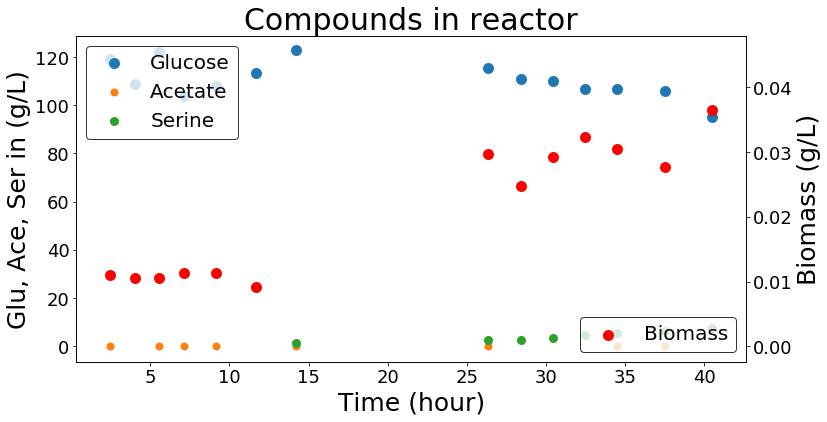

,OD,Time (hours),DilF,Citrate µg/µL,Glucose µg/µL,Pyruvate µg/µL,Succinate µg/µL,Formate µg/µL,Acetate µg/µL,EtOH µg/µL,N-Acetyl-DL-serine µg/µL,Unknown_protein mAU*min,Biomass g/L,Serine g/L
0,0.029,2.435556,5.0,NaN,119.325677,0.007777,NaN,NaN,0.026566,0.501876,NaN,0.464309,0.01102,NaN
1,0.028,4.011389,5.0,NaN,108.955392,NaN,NaN,NaN,NaN,0.492316,NaN,NaN,0.01064,NaN
2,0.028,5.537500,5.0,NaN,121.846584,0.009441,NaN,NaN,0.020573,0.462380,0.000754,NaN,0.01064,NaN
3,0.030,7.118333,5.0,NaN,103.645279,0.011234,NaN,NaN,0.026308,0.462995,NaN,NaN,0.01140,NaN
4,0.030,9.151667,5.0,NaN,107.833092,0.009529,NaN,NaN,0.028757,0.470783,NaN,NaN,0.01140,NaN
5,0.024,11.688056,5.0,NaN,113.528938,NaN,NaN,NaN,NaN,0.465548,NaN,NaN,0.00912,NaN
6,0.264,14.216667,5.0,NaN,122.677295,0.009118,NaN,NaN,0.276237,0.446824,NaN,NaN,NaN,1.282673
7,0.078,26.359444,5.0,NaN,115.428106,NaN,NaN,NaN,0.214909,0.442708,NaN,NaN,0.02964,2.766520
8,0.065,28.385000,5.0,NaN,110.664272,0.009376,NaN,NaN,NaN,0.413954,NaN,NaN,0.02470,2.729075
9,0.077,30.411111,5.0,NaN,110.205387,NaN,NaN,NaN,NaN,0.418557,NaN,NaN,0.02926,3.326725


In [50]:
R11 = pd.ExcelFile('analytical_data/modified_analytical_data/compounds_batch_R9toR12_ser.xlsx')
R11 = R11.parse('R11_compounds')
R11 = R11.replace(['n.a.'],[np.nan])
R11['Biomass g/L'][6] = 'NaN'
plot_compounds_micro(R11, 11)
R11

#### Observed: many values

In [51]:
# Ysx
substrate = R11['Glucose µg/µL'][0] - R11['Glucose µg/µL'][12]
biomass = R11['Biomass g/L'][12] - R11['Biomass g/L'][0]
Ysx = biomass/substrate
print(Ysx)

acetate = R11['Acetate µg/µL'][12] - 0
Ysa = acetate/substrate
print(Ysa)

serine = R11['Serine g/L'][12] - 0
Yss = serine/substrate
print(Yss)

Yax = biomass/acetate
print(Yax)

Yserx = biomass/serine
print(Yserx)

0.001260017472786554
0.013867308828218277
0.49349112969700815
0.09086243685743643
0.002553272788429196


#### Ysx =  0.001 gbio/gsub with an initial substrate concentration of 119.33 g/L
#### YsACE = 0.014 gacetate/gsub with an initial substrate concentration of 119.33 g/L
#### YsSER = 0.49 gacetate/gsub with an initial substrate concentration of 119.33 g/L
#### Yax =  0.09 gbio/gace with an initial substrate concentration of 119.33 g/L
#### Yserx = 0.0026 gbio/gser

#### From reactor 11 the mu was found to be 0.9483 1/h (this was deviating a lot from the other so it was actually disregarded since it seemed weird. Therefore I have disregarded that point from biomass and just calculate the slope from index 5-7

0.08033697458829407 -5.636268497049133 1.0 0.0 0.0


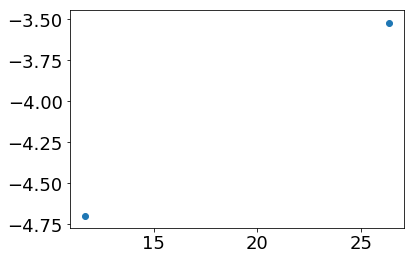

In [52]:

ln_CO2_R11 = np.log([R11['Biomass g/L'][5],R11['Biomass g/L'][7]])
time_exp_CO2_R11 = [R11['Time (hours)'][5],R11['Time (hours)'][7]]

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(time_exp_CO2_R11, ln_CO2_R11)
print(slope, intercept, r_value, p_value, std_err)

plt.scatter(time_exp_CO2_R11, ln_CO2_R11)
plt.show()

#### This value still does not fit into the normal profile of monod kinetic growth rate with inhibition
#### The data coming from reactor 11 has to be thought carefully of. Maybe there were some experimental errors

In [53]:
# qs, qa
mu = 0.9483

qs = mu/Ysx
qs_values.append(qs)
print(qs)

qsa = mu/Ysa
print(qsa)

qss = mu/Yss
print(qss)

qax = mu/Yax
print(qax)

qserx = mu/Yserx
print(qserx)

752.6086109764934
68.38385239321458
1.9216150867437753
10.436656035187422
371.4056736504858


#### qs = 752.61 gsub/(gbio*h)
#### qsACE = 68.38 gsub/(gACE*h)
#### qsSER = 1.92 gsub/(gSER*h)
#### qax = 10.44 gace/(gbio*h)
#### qserx = 371.41 gser/(gbio*h)

## amounts

In [54]:
t = R11['Time (hours)'][:7]
a = 0.0137
b = 1.0686
c = 203.65
volume = lambda t: (a*t**2 - b*t + c)/1000
R_volume = volume(t)


batch_amounts(R11, 11, R_volume, a, b, c)


R_amounts = pd.DataFrame()
R_amounts['Time (hours)'] = R11['Time (hours)'][:7]
R_amounts['Volume (L)'] = R_volume
R_amounts['Biomass (g)'] = R11['Biomass g/L'][:7]*R_volume
R_amounts['Glucose (g)'] = R11['Glucose µg/µL'][:7]*R_volume
R_amounts['Biomass initial (g)'] = R_amounts['Biomass (g)'][0]
R_amounts['Glucose initial (g)'] = R_amounts['Glucose (g)'][0]
R_amounts['a'] = a
R_amounts['b'] = b
R_amounts['c'] = c

R_amounts.to_csv('estimation/batch_amounts/R11_amounts.csv')

# Reactor 12 with initial substate 150 g/L

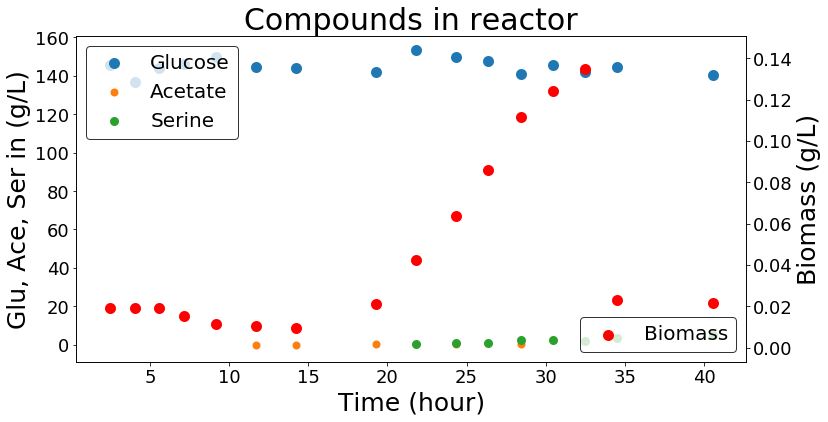

,OD,Time (hours),DilF,Citrate µg/µL,Glucose µg/µL,Pyruvate µg/µL,Succinate µg/µL,Formate µg/µL,Acetate µg/µL,EtOH µg/µL,N-Acetyl-DL-serine µg/µL,Unknown_protein mAU*min,Biomass g/L,Serine g/L
0,0.050,2.460556,5.0,NaN,145.459566,0.012374,NaN,NaN,NaN,0.495556,NaN,NaN,0.01900,NaN
1,0.050,4.036389,5.0,NaN,136.477441,0.008296,NaN,NaN,NaN,0.482157,NaN,NaN,0.01900,NaN
2,0.050,5.562500,5.0,NaN,144.078734,0.011535,NaN,NaN,NaN,0.440163,NaN,NaN,0.01900,NaN
3,0.040,7.143333,5.0,NaN,146.264242,NaN,0.068841,NaN,NaN,0.436837,NaN,NaN,0.01520,NaN
4,0.030,9.176667,5.0,NaN,149.737418,0.009656,NaN,NaN,NaN,0.474704,NaN,NaN,0.01140,NaN
5,0.027,11.713056,5.0,NaN,144.285802,NaN,NaN,NaN,0.038001,0.479364,NaN,NaN,0.01026,NaN
6,0.025,14.241667,5.0,NaN,144.080168,0.010069,NaN,NaN,0.049177,0.469339,NaN,NaN,0.00950,NaN
7,0.056,19.309167,5.0,NaN,142.086049,NaN,NaN,NaN,0.287649,0.459229,NaN,NaN,0.02128,NaN
8,0.111,21.833889,5.0,NaN,153.134601,0.008561,NaN,NaN,NaN,0.447446,NaN,NaN,0.04218,0.370044
9,0.167,24.357778,5.0,NaN,149.870101,NaN,NaN,NaN,0.238462,0.444489,NaN,NaN,0.06346,0.635830


In [55]:
R12 = pd.ExcelFile('analytical_data/modified_analytical_data/compounds_batch_R9toR12_ser.xlsx')
R12 = R12.parse('R12_compounds')
R12 = R12.replace(['n.a.'],[np.nan])
plot_compounds_micro(R12, 12)
R12

#### Observed: many values

In [304]:
# Ysx
substrate = R12['Glucose µg/µL'][0] - R12['Glucose µg/µL'][11]
biomass = R12['Biomass g/L'][11] - R12['Biomass g/L'][0]
Ysx = biomass/substrate
print(Ysx)

acetate = R12['Acetate µg/µL'][11] - 0
Ysa = acetate/substrate
print(Ysa)

serine = R12['Serine g/L'][11] - 0
Yss = serine/substrate
print(Yss)

Yax = biomass/acetate
print(Yax)

Yserx = biomass/serine
print(Yserx)

0.021234948271713502
0.04379241678129002
0.5087253289388033
0.4849001227259505
0.04174148025224029


#### Ysx =  0.02 gbio/gsub with an initial substrate concentration of 145.46 g/L
#### YsACE = 0.04 gacetate/gsub with an initial substrate concentration of 145.46 g/L
#### YsSER = 0.51 gacetate/gsub with an initial substrate concentration of 145.46 g/L
#### Yax =  0.49 gbio/gace with an initial substrate concentration of 145.46 g/L
#### Yserx = 0.04 gbio/gser

#### From reactor 12 the mu was found to be 0.1916 1/h 

In [305]:
# qs, qa
mu = 0.1916

qs = mu/Ysx
qs_values.append(qs)
print(qs)

qsa = mu/Ysa
print(qsa)

qss = mu/Yss
print(qss)

qax = mu/Yax
print(qax)

qserx = mu/Yserx
qp_values.append(qserx)
print(qserx)

9.02286163113593
4.375186712277082
0.37662760059475703
0.3951329171106149
4.590158251268933


#### qs = 9.02 gsub/(gbio*h)
#### qsACE = 4.38 gsub/(gACE*h)
#### qsSER = 0.38 gsub/(gSER*h)
#### qax = 0.39 gace/(gbio*h)
#### qserx = 4.59 gser/(gbio*h)

## amounts

In [306]:
t = R12['Time (hours)'][:9]
a = 0.0102
b = 1.0204
c = 203.58
volume = lambda t: (a*t**2 - b*t + c)/1000
R_volume = volume(t)


batch_amounts(R12, 12, R_volume, a, b, c)


R_amounts = pd.DataFrame()
R_amounts['Time (hours)'] = R12['Time (hours)'][:9]
R_amounts['Volume (L)'] = R_volume
R_amounts['Biomass (g)'] = R12['Biomass g/L'][:9]*R_volume
R_amounts['Glucose (g)'] = R12['Glucose µg/µL'][:9]*R_volume
R_amounts['Biomass initial (g)'] = R_amounts['Biomass (g)'][0]
R_amounts['Glucose initial (g)'] = R_amounts['Glucose (g)'][0]
R_amounts['a'] = a
R_amounts['b'] = b
R_amounts['c'] = c

R_amounts.to_csv('estimation/batch_amounts/R12_amounts.csv')

## Collect initial substrate values

In [307]:
initial_substrate = []
initial_substrate.append(R1['Glucose µg/µL'][0])
initial_substrate.append(R2['Glucose µg/µL'][0])
initial_substrate.append(R3['Glucose µg/µL'][0])
initial_substrate.append(R4['Glucose g/L'][0]) 
initial_substrate.append(R5['Glucose g/L'][0]) 
initial_substrate.append(R6['Glucose g/L'][0]) 
initial_substrate.append(R7['Glucose g/L'][0]) 
initial_substrate.append(R8['Glucose g/L'][0]) 
initial_substrate.append(R9['Glucose µg/µL'][0])
initial_substrate.append(R10['Glucose µg/µL'][0])
initial_substrate.append(R11['Glucose µg/µL'][0])
initial_substrate.append(R12['Glucose µg/µL'][0])

## Initial substrate values and qs saved in a data frame and as a csv

In [308]:
qs_sub_values = pd.DataFrame()
qs_sub_values['Substrate values g/L'] = initial_substrate
qs_sub_values['qs (gsub/gbio*h)'] = qs_values
qs_sub_values.to_csv('qs_values.csv')